In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import mlflow
import mlflow.sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [2]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.shape

(918, 12)

In [7]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
df.sample(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
611,62,M,TA,135,139,0,ST,137,N,0.2,Up,0
618,64,M,ASY,128,263,0,Normal,105,Y,0.2,Flat,0
268,54,M,ASY,130,242,0,Normal,91,Y,1.0,Flat,1
527,61,M,ATA,139,283,0,Normal,135,N,0.3,Up,0
49,41,M,ASY,110,289,0,Normal,170,N,0.0,Flat,1
94,39,F,NAP,110,182,0,ST,180,N,0.0,Up,0
563,55,M,ASY,135,204,1,ST,126,Y,1.1,Flat,1
331,56,M,ASY,115,0,1,ST,82,N,-1.0,Up,1
776,62,F,ASY,150,244,0,Normal,154,Y,1.4,Flat,1
155,56,M,ASY,155,342,1,Normal,150,Y,3.0,Flat,1


In [9]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [10]:
df.describe(include="O")

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [11]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [12]:
df.duplicated().sum()

0

In [13]:
df.index

RangeIndex(start=0, stop=918, step=1)

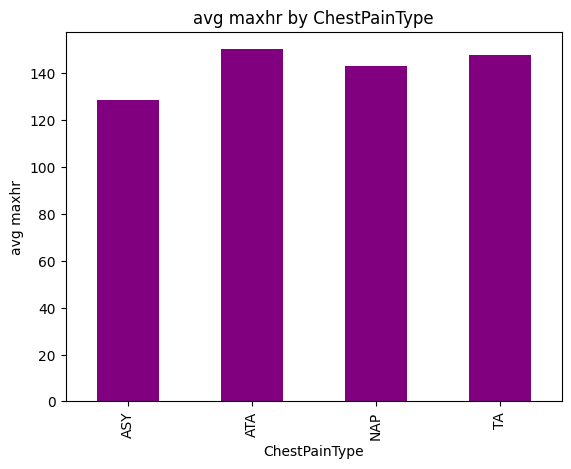

In [14]:
df.groupby('ChestPainType')['MaxHR'].mean().plot(kind='bar', color='purple')
plt.title("avg maxhr by ChestPainType")
plt.ylabel("avg maxhr")
plt.show()

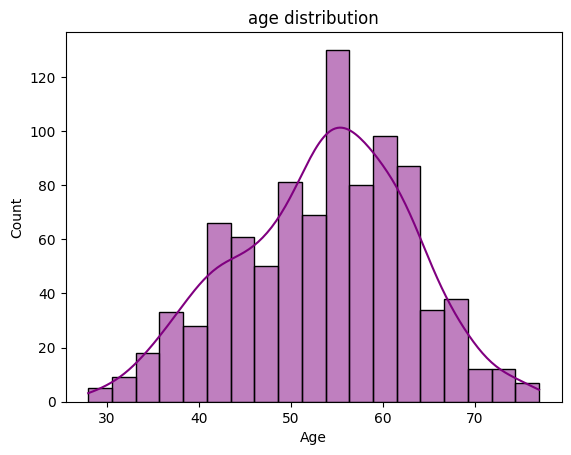

In [15]:
sns.histplot(df['Age'], kde=True , color='purple')
plt.title("age distribution")
plt.show()

In [16]:
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

In [17]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [19]:
X_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
400,50,F,ASY,160,0,1,Normal,110,N,0.0,Flat
107,34,M,ATA,150,214,0,ST,168,N,0.0,Up
565,61,M,ASY,141,292,0,ST,115,Y,1.7,Flat
578,57,M,ASY,156,173,0,LVH,119,Y,3.0,Down
372,63,M,ASY,185,0,0,Normal,98,Y,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
534,59,M,ASY,125,222,0,Normal,135,Y,2.5,Down
584,64,M,ASY,141,244,1,ST,116,Y,1.5,Flat
493,51,M,NAP,137,339,0,Normal,127,Y,1.7,Flat
527,61,M,ATA,139,283,0,Normal,135,N,0.3,Up


In [20]:
y_train

400    1
107    0
565    1
578    1
372    1
      ..
534    1
584    1
493    1
527    0
168    0
Name: HeartDisease, Length: 734, dtype: int64

In [21]:
D = OneHotEncoder(drop = 'first',sparse_output=False)

In [22]:
X_train_new = D.fit_transform(X_train[['Sex','RestingECG','ChestPainType','ExerciseAngina','ST_Slope']])
X_test_new = D.transform(X_test[['Sex','RestingECG','ChestPainType','ExerciseAngina','ST_Slope']])

In [23]:
X_train_final = np.concatenate([X_train_new, X_train[['Cholesterol','RestingBP', 'MaxHR', 'Oldpeak', 'Age']].values], axis=1)
X_test_final = np.concatenate([X_test_new, X_test[['Cholesterol','RestingBP', 'MaxHR', 'Oldpeak', 'Age']].values], axis=1)

In [24]:
X_train_final

array([[  0. ,   1. ,   0. , ..., 110. ,   0. ,  50. ],
       [  1. ,   0. ,   1. , ..., 168. ,   0. ,  34. ],
       [  1. ,   0. ,   1. , ..., 115. ,   1.7,  61. ],
       ...,
       [  1. ,   1. ,   0. , ..., 127. ,   1.7,  51. ],
       [  1. ,   1. ,   0. , ..., 135. ,   0.3,  61. ],
       [  1. ,   1. ,   0. , ..., 100. ,   0. ,  58. ]])

In [25]:
final_feature_names = list(D.get_feature_names_out(['Sex', 'RestingECG', 'ChestPainType', 'ExerciseAngina', 'ST_Slope'])) + ['Cholesterol','RestingBP', 'MaxHR', 'Oldpeak', 'Age']
X_train_final_df = pd.DataFrame(X_train_final, columns=final_feature_names)
X_test_final_df = pd.DataFrame(X_test_final, columns=final_feature_names)

In [26]:
X_train_final_df.head()

,Sex_M,RestingECG_Normal,RestingECG_ST,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,Cholesterol,RestingBP,MaxHR,Oldpeak,Age
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,160.0,110.0,0.0,50.0
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,214.0,150.0,168.0,0.0,34.0
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,292.0,141.0,115.0,1.7,61.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,173.0,156.0,119.0,3.0,57.0
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,185.0,98.0,0.0,63.0


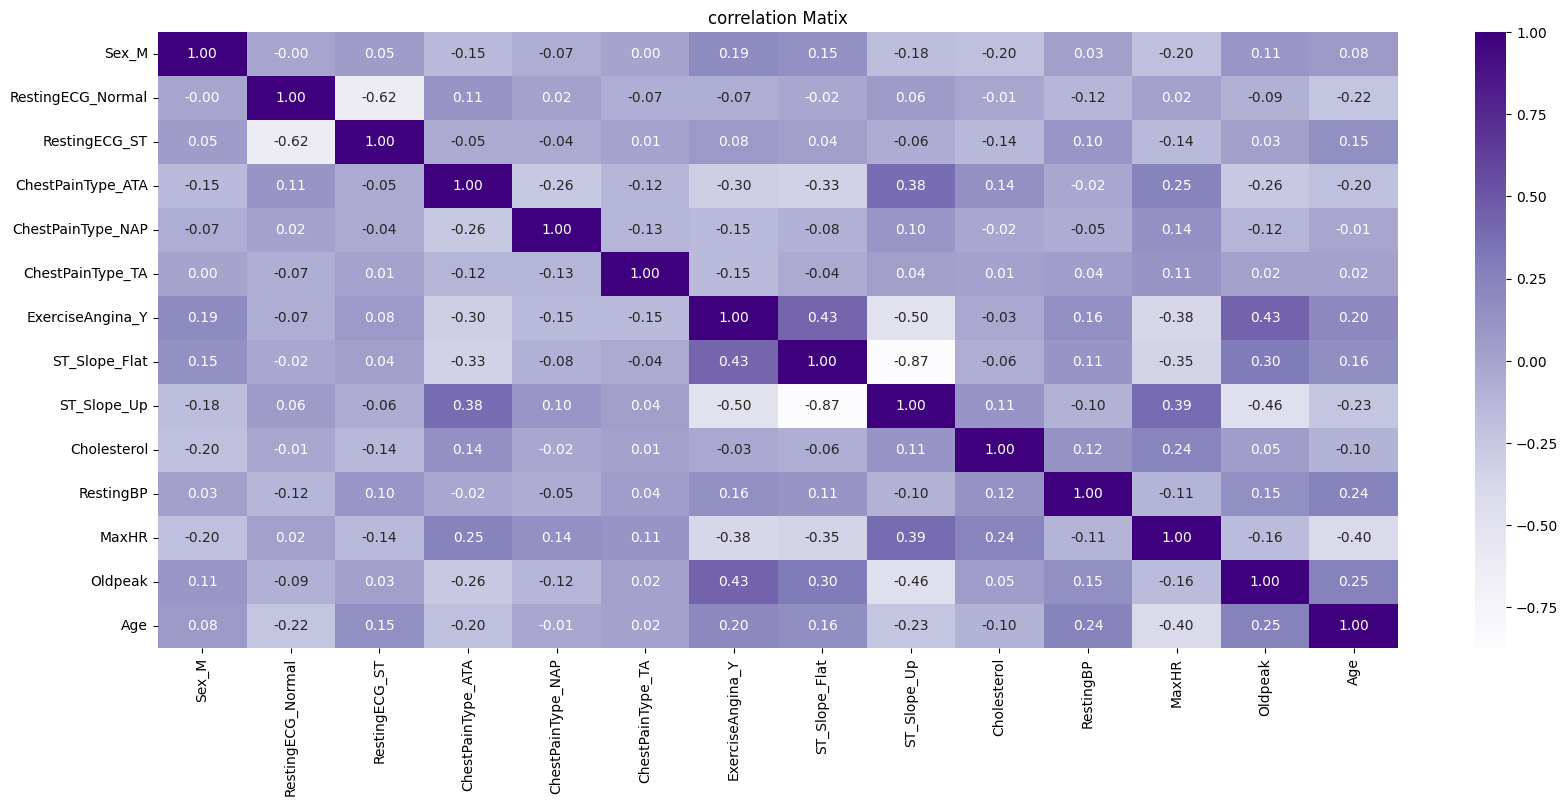

In [27]:
plt.figure(figsize=(20, 8))
corr_matrix = X_train_final_df.corr()
sns.heatmap(corr_matrix, annot=True,cmap='Purples', fmt=".2f")
plt.title("correlation Matix")
plt.show()

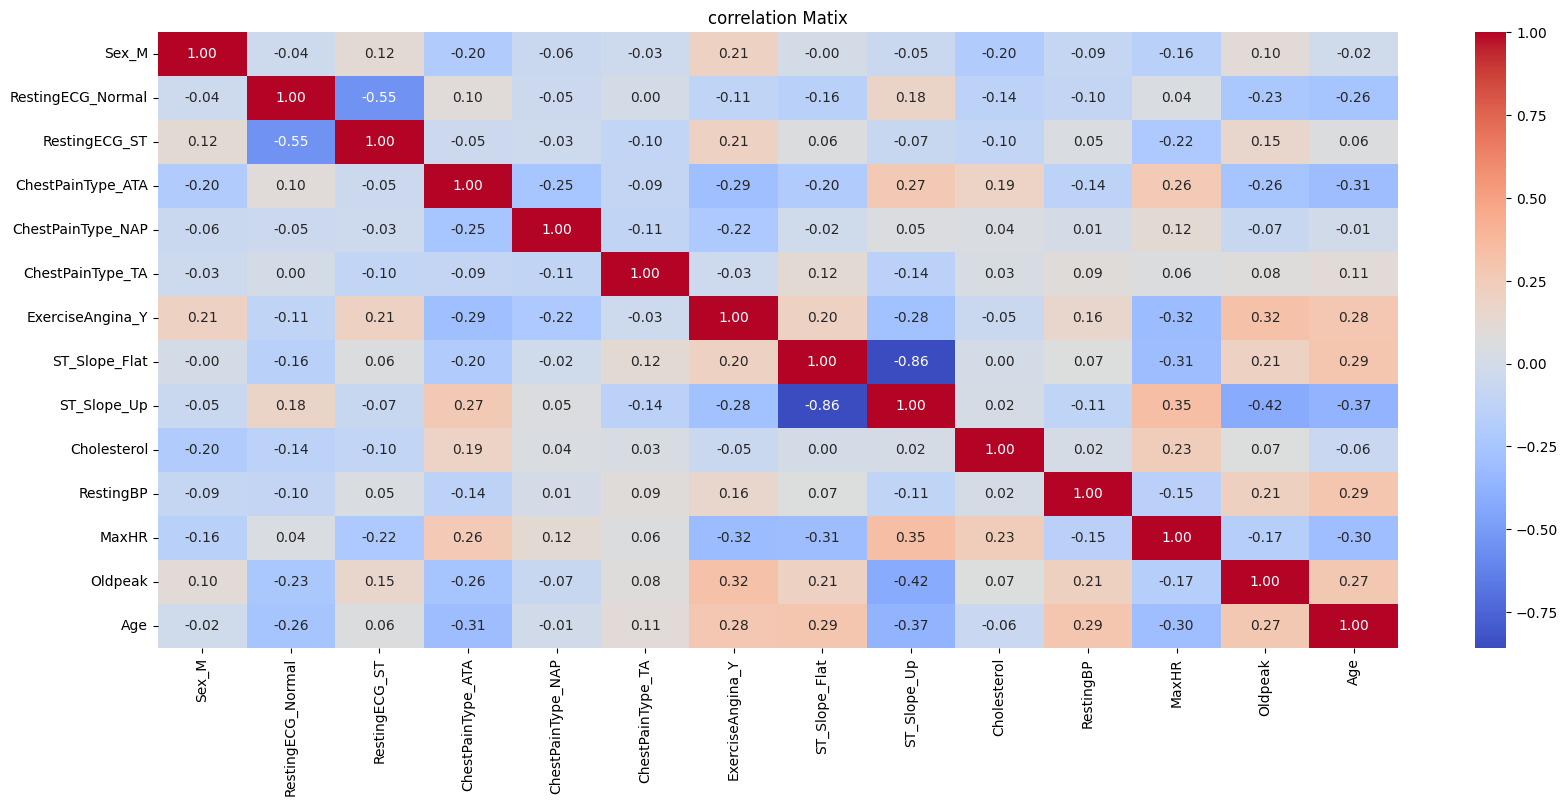

In [28]:
plt.figure(figsize=(20, 8))
corr_matrix = X_test_final_df.corr()
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm', fmt=".2f")
plt.title("correlation Matix")
plt.show()

In [29]:
numerical_columns = [col for col in df.columns if df[col].nunique() > 10]
categorical_columns = df.columns.difference(numerical_columns).difference(['Diagnosis']).to_list()

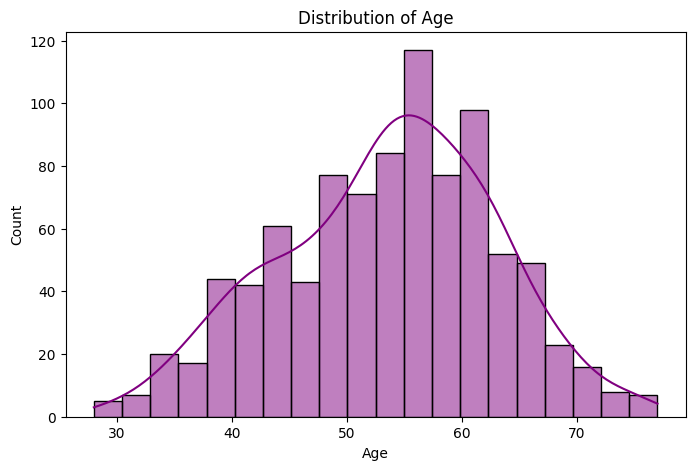

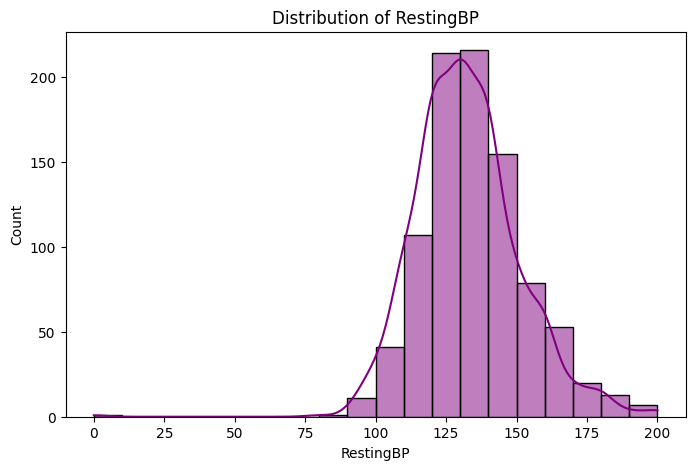

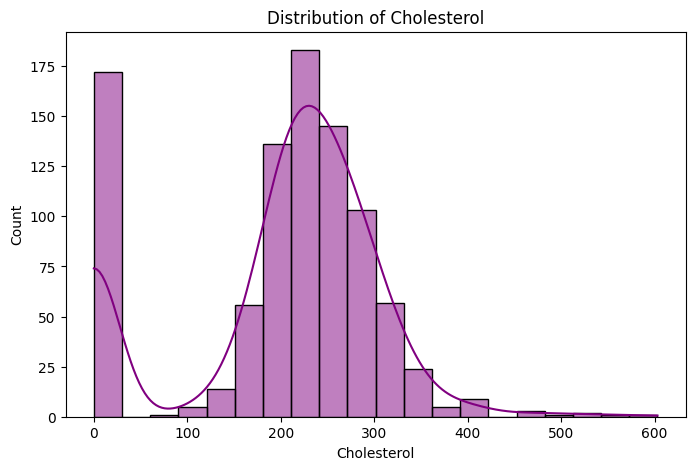

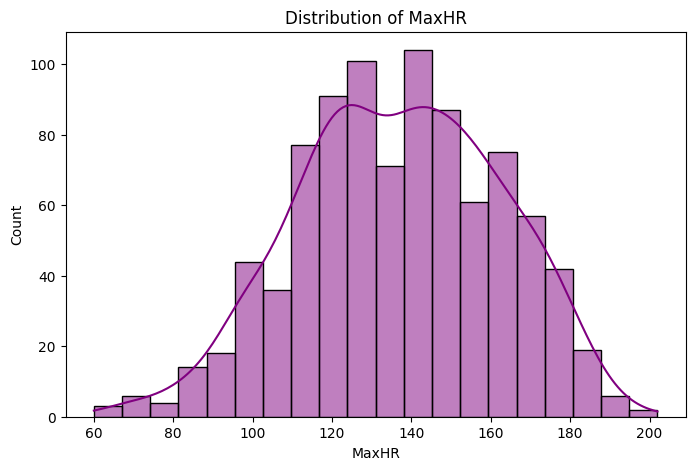

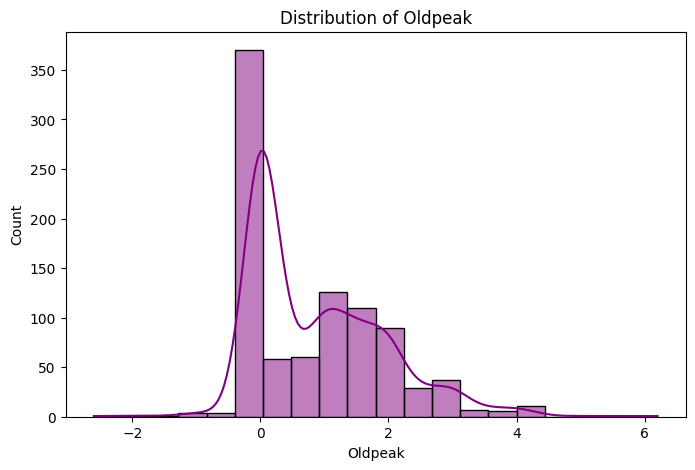

In [30]:
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=column, kde=True, bins=20, color="purple")
    plt.title(f'Distribution of {column}')
    plt.show()

In [31]:
Q1 = df["RestingBP"].quantile(0.25)
Q3 = df["RestingBP"].quantile(0.75)

IQR = Q3 - Q1 

upper_bound = Q3 + 1.5 * IQR 
lower_bound = Q1 - 1.5 * IQR 


df["RestingBP"] = df["RestingBP"].clip(lower=lower_bound, upper=upper_bound)

Text(0.5, 1.0, 'histplot of RestingBP')

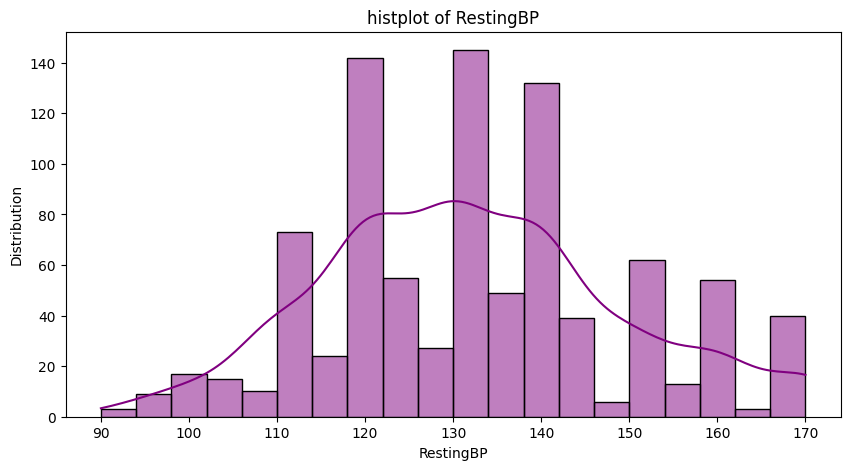

In [32]:
plt.figure(figsize=(10,5))
sns.histplot(df["RestingBP"],bins=20,kde=True,color="purple")
plt.xlabel("RestingBP")
plt.ylabel("Distribution")
plt.title("histplot of RestingBP")

In [33]:
Q1 = df["Cholesterol"].quantile(0.25)
Q3 = df["Cholesterol"].quantile(0.75)

IQR = Q3 - Q1 

upper_bound = Q3 + 1.5 * IQR 
lower_bound = Q1 - 1.5 * IQR 


df["Cholesterol"] = df["Cholesterol"].clip(lower=lower_bound, upper=upper_bound)

Text(0.5, 1.0, 'histplot of Cholesterol')

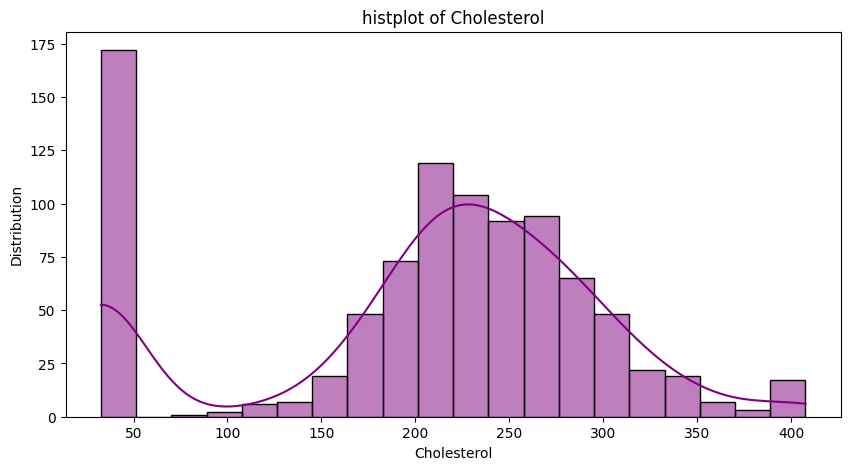

In [34]:
plt.figure(figsize=(10,5))
sns.histplot(df["Cholesterol"],bins=20,kde=True,color="purple")
plt.xlabel("Cholesterol")
plt.ylabel("Distribution")
plt.title("histplot of Cholesterol")

In [35]:
Q1 = df["Oldpeak"].quantile(0.25)
Q3 = df["Oldpeak"].quantile(0.75)

IQR = Q3 - Q1 

upper_bound = Q3 + 1.5 * IQR 
lower_bound = Q1 - 1.5 * IQR 


df["Oldpeak"] = df["Oldpeak"].clip(lower=lower_bound, upper=upper_bound)

Text(0.5, 1.0, 'histplot of Oldpeak')

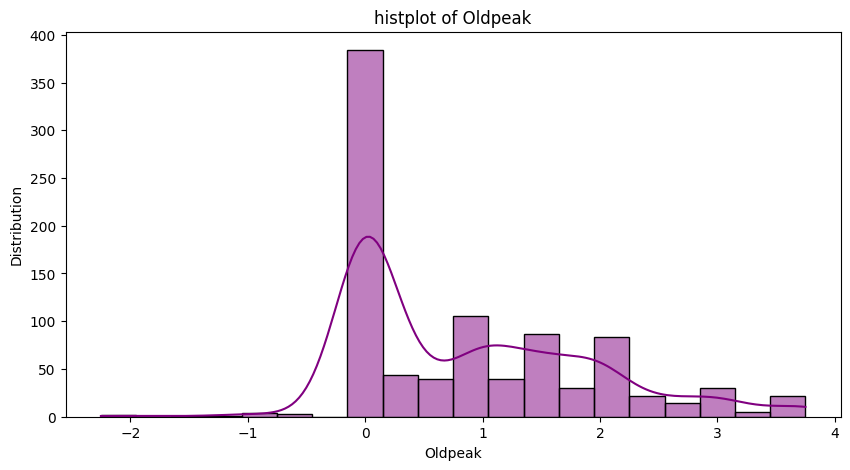

In [36]:
plt.figure(figsize=(10,5))
sns.histplot(df["Oldpeak"],bins=20,kde=True,color="purple")
plt.xlabel("Oldpeak")
plt.ylabel("Distribution")
plt.title("histplot of Oldpeak")

In [37]:

scaler = StandardScaler()
numeric_features = ['Age','RestingBP','Cholesterol','Oldpeak']
X_test_final_df[numeric_features]= scaler.fit_transform(X_test_final_df[numeric_features])
X_train_final_df[numeric_features]= scaler.fit_transform(X_train_final_df[numeric_features])

In [38]:
X_train_final_df

,Sex_M,RestingECG_Normal,RestingECG_ST,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,Cholesterol,RestingBP,MaxHR,Oldpeak,Age
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.818883,1.516067,110.0,-0.822972,-0.355086
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.139837,0.972711,168.0,-0.822972,-2.043396
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.853763,0.483690,115.0,0.758584,0.805628
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.235431,1.298724,119.0,1.968010,0.383550
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.818883,2.874457,98.0,-0.822972,1.016667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.213061,-0.385679,135.0,1.502846,0.594589
730,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.414424,0.483690,116.0,0.572519,1.122186
731,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.283950,0.266348,127.0,0.758584,-0.249566
732,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.771387,0.375019,135.0,-0.543874,0.805628


In [39]:
X_train_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sex_M              734 non-null    float64
 1   RestingECG_Normal  734 non-null    float64
 2   RestingECG_ST      734 non-null    float64
 3   ChestPainType_ATA  734 non-null    float64
 4   ChestPainType_NAP  734 non-null    float64
 5   ChestPainType_TA   734 non-null    float64
 6   ExerciseAngina_Y   734 non-null    float64
 7   ST_Slope_Flat      734 non-null    float64
 8   ST_Slope_Up        734 non-null    float64
 9   Cholesterol        734 non-null    float64
 10  RestingBP          734 non-null    float64
 11  MaxHR              734 non-null    float64
 12  Oldpeak            734 non-null    float64
 13  Age                734 non-null    float64
dtypes: float64(14)
memory usage: 80.4 KB


In [40]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_final_df, y_train)

y_pred_xgb = xgb_model.predict(X_test_final_df)

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

Accuracy: 0.842391304347826
              precision    recall  f1-score   support

           0       0.85      0.82      0.83        89
           1       0.84      0.86      0.85        95

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                    param_grid,
                    cv=5,
                    scoring='accuracy')

grid.fit(X_train_final_df, y_train)

print("best models:", grid.best_params_)

best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test_final_df)
print("Accuracy:", accuracy_score(y_test, y_pred_best))

best models: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Accuracy: 0.8532608695652174


# MODELE

In [42]:
clf = RandomForestClassifier()

In [43]:
clf.fit(X_train_final_df,y_train)

RandomForestClassifier()

In [44]:
y_pred=clf.predict(X_test_final_df)

In [45]:
y_pred

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0])

In [46]:
y_test

440    1
382    1
567    1
230    0
470    1
      ..
894    0
399    1
719    1
318    1
686    0
Name: HeartDisease, Length: 184, dtype: int64

In [47]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8532608695652174

In [48]:
lo_model = LogisticRegression()
lo_model.fit(X_train_final_df, y_train)

/home/quentin/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
y_pred_lo=lo_model.predict(X_test_final_df)
print(accuracy_score(y_pred_lo, y_test))

0.842391304347826


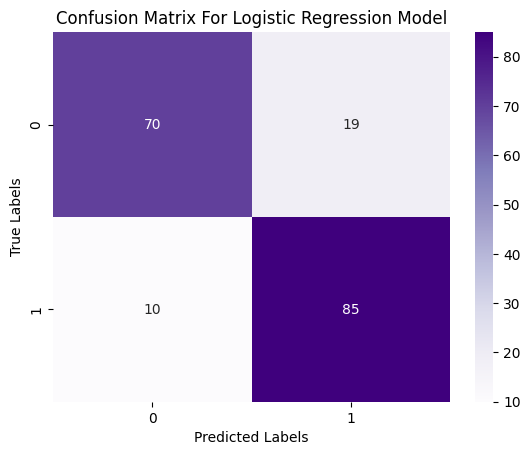

In [50]:
cm_lo = confusion_matrix(y_test, y_pred_lo)
sns.heatmap(cm_lo, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For Logistic Regression Model')
plt.show()

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84        89
           1       0.84      0.88      0.86        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



# MONITORING

In [52]:
pip install mlflow



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [79]:
#mlflow ui  # puis aller sur http://localhost:5000
